<a href="https://colab.research.google.com/github/mcash8/DVBS2X-DNN-Implementation/blob/main/Feed%20Forward%20NN/FFNN_DVBSAPSK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Imports -Must Run After Mounting Drive

In [2]:
import os
import scipy.io as spio
import math
import time
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import MeanSquaredError

In [ ]:
print(tf.__version__)

2.8.2


#Training w/ Data Generated w/o PassBand

Train Model

In [ ]:
start_time = time.time()

#parameters
num_classes = 2
batch_size = 64
epochs = 100

%cd /content/drive/My Drive/NN\ Input/SNR\ Optimization
matname = 'DVBSAPSK_data_SNR_10.mat'
mat = spio.loadmat(matname, squeeze_me=True)
x_train = mat['x_train']
x_valid = mat['val_data']
y_valid = mat['val_target']
y_train = mat['y_train']

'''
matname = 'DVBSAPSK_pred_23.mat'
mat = spio.loadmat(matname, squeeze_me=True)
x_test = mat['train_data']
'''

#cast to float32
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32') 

print(x_train.shape, 'train samples')
print(x_valid.shape, 'valid samples')

print(y_train.shape, 'train labels')
print(y_valid.shape, 'valid labels')

print('Label Examples:\n', y_train)
print('Input Examples:\n', x_train)

# Define the network
model = Sequential()
model.add(Dense(50, activation='elu', input_dim=18))
model.add(Dense(50, activation='elu'))
model.add(Dense(num_classes, activation='tanh'))

model.summary()

model.compile(loss=keras.metrics.mean_squared_error,
            optimizer=SGD(learning_rate=0.1),
            metrics=[keras.metrics.RootMeanSquaredError(name='rmse')])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(x_valid, y_valid))

elapsedTime = (time.time() - start_time)/60
print("--- %.2f minutes ---" % elapsedTime)

score = model.evaluate(x_train, y_train, verbose=2)
print('Final Training MSE:', score[0])
print('Final Training RMSE:', score[1])

Save Model and Training History

In [ ]:
#save model
savename = 'DVBSAPSK_SNR_10.h5'
model.save(savename)
!cp $savename /content/drive/MyDrive/NN\ Input/packet\ test


cp: 'DVBSAPSK_SNR_10.h5' and '/content/drive/MyDrive/NN Input/packet test/DVBSAPSK_SNR_10.h5' are the same file


In [ ]:
#save history for graphing  
hist_df = pd.DataFrame(history.history) 

# save to csv: 
hist_csv_file = 'blah.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

!cp $hist_csv_file /content/drive/MyDrive/NN\ Output/FFNNEq/Saved\ Models

predictions = model.predict(x_test)
matname = 'blah.mat'
spio.savemat(matname, {'pred': predictions})

!cp $matname /content/drive/MyDrive/NN\ Output/FFNNEq/Saved\ Models

Plot losses

/content/drive/MyDrive/NN Output/FFNNEq/Saved Models
cp: 'loss_DVBSAPSK_100_23.png' and '/content/drive/MyDrive/NN Output/FFNNEq/Saved Models/loss_DVBSAPSK_100_23.png' are the same file


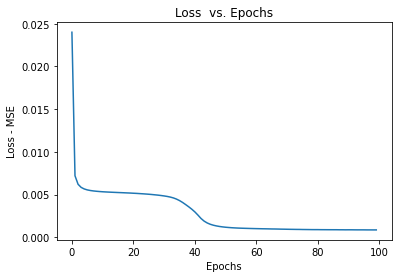

In [ ]:
from pandas import read_csv
import matplotlib.pyplot as plt

%cd /content/drive/MyDrive/NN\ Output/FFNNEq/Saved\ Models
hist_csv_file = 'history_DVBSAPSK_100_23.csv'
data = read_csv(hist_csv_file)

loss_data = data['loss']
plt.plot(loss_data)
plt.xlabel('Epochs') 
plt.ylabel('Loss - MSE') 
plt.title("Loss  vs. Epochs")

#save plt
plot_name = 'loss_DVBSAPSK_100_23.png'
plt.savefig(plot_name)
!cp $plot_name /content/drive/MyDrive/NN\ Output/FFNNEq/Saved\ Models

Testing random seed generator theory

In [ ]:
#load model 
%cd /content/drive/My Drive/NN\ Input/debug
model = tf.keras.models.load_model('DVBSAPSK_100.h5') #load from google drive
matname = 'DVBSAPSK_pred_10_rngTest.mat'
mat = spio.loadmat(matname, squeeze_me=True)
x_test = mat['train_data']

predictions = model.predict(x_test)
matname = 'DVBSAPSK_100_10_rng.mat'
spio.savemat(matname, {'pred': predictions})

/content/drive/My Drive/NN Input/debug




# Training w/ Data Generated to mimic passband 


Testing w/ Data generated to mimic passband 

In [ ]:
start_time = time.time()

#parameters
num_classes = 2
batch_size = 64
epochs = 100

%cd /content/drive/My Drive/NN\ Input/AWGN\ Only
matname = 'DVBSAPSK_data_SNR_2.mat'
mat = spio.loadmat(matname, squeeze_me=True)
x_train = mat['x_train']
x_valid = mat['val_data']
y_valid = mat['val_target']
y_train = mat['y_train']


#cast to float32
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
#x_test = x_test.astype('float32') 

print(x_train.shape, 'train samples')
print(x_valid.shape, 'valid samples')

print(y_train.shape, 'train labels')
print(y_valid.shape, 'valid labels')

print('Label Examples:\n', y_train)
print('Input Examples:\n', x_train)

# Define the network
model = Sequential()
model.add(Dense(50, activation='elu', input_dim=18))
model.add(Dense(50, activation='elu'))
model.add(Dense(num_classes, activation='tanh'))

model.summary()

model.compile(loss=keras.metrics.mean_squared_error,
            optimizer=SGD(learning_rate=0.1),
            metrics=[keras.metrics.RootMeanSquaredError(name='rmse')])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(x_valid, y_valid))

elapsedTime = (time.time() - start_time)/60
print("--- %.2f minutes ---" % elapsedTime)

score = model.evaluate(x_train, y_train, verbose=2)
print('Final Training MSE:', score[0])
print('Final Training RMSE:', score[1])

#save model
savename = 'DVBSAPSK_SNR_2.h5'
model.save(savename)
!cp $savename /content/drive/MyDrive/NN\ Output/FFNNEq/Saved\ Models

Save training history and get test sequence

In [ ]:
#save history for graphing  
hist_df = pd.DataFrame(history.history) 

# save to csv: 
hist_csv_file = 'hist_DVBSAPSK_SNR_2.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

!cp $hist_csv_file /content/drive/MyDrive/NN\ Output/FFNNEq/Saved\ Models
'''
predictions = model.predict(x_test)
matname = 'DVBSAPSK_pred.mat'
spio.savemat(matname, {'pred': predictions})
'''

!cp $matname /content/drive/MyDrive/NN\ Output/FFNNEq/Saved\ Models

cp: 'hist_DVBSAPSK_SNR_2.csv' and '/content/drive/MyDrive/NN Output/FFNNEq/Saved Models/hist_DVBSAPSK_SNR_2.csv' are the same file
cp: cannot stat 'DVBSAPSK_data_SNR_2.mat': No such file or directory


Plot loss

/content/drive/MyDrive/NN Output/FFNNEq/Saved Models
cp: 'loss_SNR.png' and '/content/drive/MyDrive/NN Output/FFNNEq/Saved Models/loss_SNR.png' are the same file


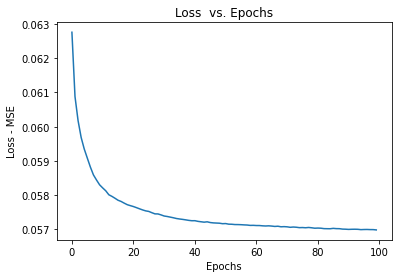

In [ ]:
%cd /content/drive/MyDrive/NN\ Output/FFNNEq/Saved\ Models
hist_csv_file = 'hist_DVBSAPSK_SNR_2.csv'
data = read_csv(hist_csv_file)

loss_data = data['loss']
plt.plot(loss_data)
plt.xlabel('Epochs') 
plt.ylabel('Loss - MSE') 
plt.title("Loss  vs. Epochs")

#save plt
plot_name = 'loss_SNR.png'
plt.savefig(plot_name)
!cp $plot_name /content/drive/MyDrive/NN\ Output/FFNNEq/Saved\ Models

#Varying Packet Size Test

In [ ]:
%cd /content/drive/My Drive/NN\ Input/packet\ test 
nb = [100000]
#nb = [5000, 10000, 50000]

#load model and make predictions
model = tf.keras.models.load_model('DVBSAPSK_SNR_10.h5') #model trained on 100 10,000 integer length sequences

for i in nb:
    for x in range(1,11):
        matname = 'DVBSAPSK_pred_SRRC_%dpck_%d.mat' % (i,x)
        mat = spio.loadmat(matname, squeeze_me=True)
        x_test = mat['train_data']

        predictions = model.predict(x_test)

        #save predictions 
        matname = 'DVBSAPSK_pred_%dpck_%d.mat' % (i,x)
        spio.savemat(matname, {'pred': predictions})

/content/drive/My Drive/NN Input/packet test


#Diff SNR test

In [ ]:
%cd /content/drive/My Drive/NN\ Input/packet\ test 

#load model and make predictions
model = tf.keras.models.load_model('DVBSAPSK_SNR_10.h5')
 
%cd /content/drive/My Drive/NN\ Input/SNR\ Optimization

for x in range(1,11):
    matname = 'DVBSAPSK_pred_SNR_5_%d' % (x)
    mat = spio.loadmat(matname, squeeze_me=True)
    x_test = mat['train_data']

    predictions = model.predict(x_test)

    #save predictions 
    matname = 'DVBSAPSK_pred_5_%d.mat' % (x)
    spio.savemat(matname, {'pred': predictions})

/content/drive/My Drive/NN Input/packet test
/content/drive/My Drive/NN Input/SNR Optimization


#No Optimal SNR Test

In [ ]:
%cd /content/drive/My Drive/NN\ Input/NoOptTest

#load model and make predictions
i = 0
model_names = ['DVBSAPSK_SNR_23.h5']
out_folder = ['SNR23']
for name in model_names: 
    model = tf.keras.models.load_model(name)
    output = out_folder[i]
    %mkdir $output
    i+=1

    snr = list(range(-2,24))

    for snrs in snr:
        foldername = 'SNR_%d' % snrs
        %cd $foldername
        for x in range(1,11):
            #load
            matname = 'DVBSAPSK_pred_%d' % (x)
            mat = spio.loadmat(matname, squeeze_me=True)
            x_test = mat['train_data']

            predictions = model.predict(x_test)

            #save predictions 
            %cd ..
            %cd $output
            matname = 'DVBSAPSK_out_snr_%d_%d.mat' % (snrs,x)
            spio.savemat(matname, {'pred': predictions})
            %cd ..
            %cd $foldername
        %cd ..
 

#HPA Test

Train Model

In [ ]:
start_time = time.time()

#parameters
num_classes = 2
batch_size = 64
epochs = 100

%cd /content/drive/My Drive/NN\ Input/HPA
BO = [1]
for bo in BO: 
    matname = 'DVBSAPSK_data_BO_%d.mat' % bo
    mat = spio.loadmat(matname, squeeze_me=True)
    x_train = mat['x_train']
    x_valid = mat['val_data']
    y_valid = mat['val_target']
    y_train = mat['y_train']


    #cast to float32
    x_train = x_train.astype('float32')
    x_valid = x_valid.astype('float32')
    #x_test = x_test.astype('float32') 

    print(x_train.shape, 'train samples')
    print(x_valid.shape, 'valid samples')

    print(y_train.shape, 'train labels')
    print(y_valid.shape, 'valid labels')

    print('Label Examples:\n', y_train)
    print('Input Examples:\n', x_train)

    # Define the network
    model = Sequential()
    model.add(Dense(50, activation='elu', input_dim=18))
    model.add(Dense(50, activation='elu'))
    model.add(Dense(num_classes, activation='tanh'))

    model.summary()

    model.compile(loss=keras.metrics.mean_squared_error,
                optimizer=SGD(learning_rate=0.1),
                metrics=[keras.metrics.RootMeanSquaredError(name='rmse')])

    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=2,
                        validation_data=(x_valid, y_valid))

    elapsedTime = (time.time() - start_time)/60
    print("--- %.2f minutes ---" % elapsedTime)

    savename = 'model_BO_%d.h5' % bo
    model.save(savename)

Evaluate Model

In [ ]:
%cd /content/drive/My Drive/NN\ Input/HPA
BO = [1]

for bo in BO: 
    #store results in folder
    foldername = 'BO_%d' % bo
    %mkdir $foldername 

    model_name = 'model_BO_%d.h5' % bo
    model = tf.keras.models.load_model(model_name) #load trained model at set back off
    for x in range(1,11): 
        matname = 'DVBSAPSK_pred_%d_%d.mat' % (bo, x)
        mat = spio.loadmat(matname, squeeze_me=True)
        x_test = mat['train_data']

        predictions = model.predict(x_test)
        
        %cd $foldername 

        matname = 'DVBSAPSK_out_%d_%d.mat' % (bo,x)
        spio.savemat(matname, {'pred': predictions})

        %cd .. 

Evaluate Performance on Test Sequences At Different Back Offs

In [ ]:
%cd /content/drive/My Drive/NN\ Input/HPA
%mkdir alt_test


BO = [1,7,30]

for bo in BO: 
    model_name = 'model_BO_%d.h5' % bo
    print(model_name)
    model = tf.keras.models.load_model(model_name) #load trained model at set back off

    if bo == 1: 
        alt_seq = [7,30]
    elif bo == 7: 
        alt_seq = [1,30]
    else: 
        alt_seq = [1,7]

    #store results in folder
    %cd alt_test
    foldername = 'BO_%d' % bo
    %mkdir $foldername 
    %cd .. 

    for seq in alt_seq: 
        print(seq)
        for x in range(1,11): 
            matname = 'DVBSAPSK_pred_%d_%d.mat' % (seq, x)
            print(matname)
            mat = spio.loadmat(matname, squeeze_me=True)
            x_test = mat['train_data']

            predictions = model.predict(x_test)
            %cd alt_test
            %cd $foldername 

            matname = 'DVBSAPSK_out_bo_%d_%d_%d.mat' % (bo,seq,x)
            spio.savemat(matname, {'pred': predictions})

            %cd .. 
            %cd ..

#HPA w/ AWGN 

Train Model

In [ ]:
%cd /content/drive/My Drive/NN\ Input/HPA/AWGN/Train\ Data/wnd1
start_time = time.time()

#parameters
num_classes = 2
batch_size = 64
epochs = 100

BO = [1,7,30]
SNR = [2,10,23]

for snr in SNR: 
    for bo in BO: 
        matname = 'DVBSAPSK_data_SNR_%d_BO_%d.mat' % (snr, bo)
        print(matname)
        mat = spio.loadmat(matname, squeeze_me=True)
        x_train = mat['x_train']
        x_valid = mat['val_data']
        y_valid = mat['val_target']
        y_train = mat['y_train']


        #cast to float32
        x_train = x_train.astype('float32')
        x_valid = x_valid.astype('float32')
        #x_test = x_test.astype('float32') 

        print(x_train.shape, 'train samples')
        print(x_valid.shape, 'valid samples')

        print(y_train.shape, 'train labels')
        print(y_valid.shape, 'valid labels')

        print('Label Examples:\n', y_train)
        print('Input Examples:\n', x_train)

        # Define the network - change input dim based on window size
        model = Sequential()
        model.add(Dense(50, activation='elu', input_dim=2))
        model.add(Dense(50, activation='elu'))
        model.add(Dense(num_classes, activation='tanh'))

        model.summary()

        model.compile(loss=keras.metrics.mean_squared_error,
                    optimizer=SGD(learning_rate=0.1),
                    metrics=[keras.metrics.RootMeanSquaredError(name='rmse')])

        history = model.fit(x_train, y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=2,
                            validation_data=(x_valid, y_valid))

        elapsedTime = (time.time() - start_time)/60
        print("--- %.2f minutes ---" % elapsedTime)

        savename = 'model_SNR_%d_BO_%d_wnd8.h5' % (snr,bo)
        model.save(savename)

Evaluate Performance

In [ ]:
%cd /content/drive/My Drive/NN\ Input/HPA/AWGN/Test\ Data/wnd1/wnd1

BO = [1] #backoffs 
train_snrs = [2,10] #training snrs
snrs = list(range(-2,24))  #snrs

start_time = time.time()
for train_snr in train_snrs: 
    for bo in BO: 
        #make folder for results
        foldername = 'BO_%d_trainSNR_%d' % (bo, train_snr) 
        %mkdir $foldername

        %cd /content/drive/My Drive/NN\ Input/HPA/AWGN/Train\ Data/wnd1
        model_name = 'model_SNR_%d_BO_%d_wnd1.h5' % (train_snr, bo)  #format model name
        model = tf.keras.models.load_model(model_name) #load trained model at set back off and snr

        for snr in snrs:  
            #loop through snrs  
            for x in range(1,11):
                #loop through packets

                %cd /content/drive/My Drive/NN\ Input/HPA/AWGN/Test\ Data/wnd1/wnd1
                folder = 'BO%d' % (bo)
                %cd $folder
                matname = 'DVBSAPSK_pred_bo_%d_snr_%d_%d' % (bo, snr, x)
                print(matname)
                mat = spio.loadmat(matname, squeeze_me=True) #load data
                x_test = mat['train_data']
                
                %cd .. 
                predictions = model.predict(x_test) #make predictions
                %cd $foldername 

                #save predictions 
                matname = 'DVBSAPSK_out_bo_%d_snr_%d_%d.mat' % (bo,snr,x)
                spio.savemat(matname, {'pred': predictions})

                %cd /content/drive/My Drive/NN\ Input/HPA/AWGN/Test\ Data/wnd1/wnd1

elapsedTime = (time.time() - start_time)/60
print("--- %.2f minutes ---" % elapsedTime)

#AWGN Trained Models Eval on HPA 30dB data

In [ ]:
'''
Evaluate models trained on AWGN data at SNRs 2dB, 10dB, and 23dB on test data 
generated with 30dB back off
'''
%cd /content/drive/My Drive/NN\ Input/NoOptTest
snrs = [2,10,23]
SNRs = list(range(-2,24))
folder = 'AWGN_NN_HPA_data'
%mkdir $folder
for snr in snrs:
   
    model_name = "DVBSAPSK_SNR_%d.h5" % snr
    model = tf.keras.models.load_model(model_name) #load trained model 

    for EbNo in SNRs:
        for x in range(1,11):
            matname = 'DVBSAPSK_pred_bo_%d_snr_%d_%d.mat' % (30, EbNo, x)
            print(matname)
            mat = spio.loadmat(matname, squeeze_me=True) #load data
            x_test = mat['train_data']

            predictions = model.predict(x_test) #make predictions

            %cd $folder 
            #save predictions 
            matname = 'DVBSAPSK_out_bo_%d_mdl_%d_EbNo_%d_%d.mat' % (30,snr,EbNo,x)
            spio.savemat(matname, {'pred': predictions})

            %cd .. 


#AWGN Only Models


Train Data

In [ ]:
start_time = time.time()

#parameters
num_classes = 2
batch_size = 64
epochs = 100

%cd /content/drive/My Drive/NN\ Input/AWGN\ Only/Train\ Data
snrs = [2, 10, 23]

for snr in snrs: 
    matname = 'DVBSAPSK_data_snr_%d.mat' % (snr)
    mat = spio.loadmat(matname, squeeze_me=True)
    x_train = mat['x_train']
    x_valid = mat['val_data']
    y_valid = mat['val_target']
    y_train = mat['y_train']


    #cast to float32
    x_train = x_train.astype('float32')
    x_valid = x_valid.astype('float32')
    #x_test = x_test.astype('float32') 

    print(x_train.shape, 'train samples')
    print(x_valid.shape, 'valid samples')

    print(y_train.shape, 'train labels')
    print(y_valid.shape, 'valid labels')

    print('Label Examples:\n', y_train)
    print('Input Examples:\n', x_train)

    # Define the network
    model = Sequential()
    model.add(Dense(50, activation='elu', input_dim=18))
    model.add(Dense(50, activation='elu'))
    model.add(Dense(num_classes, activation='tanh'))

    model.summary()

    model.compile(loss=keras.metrics.mean_squared_error,
                optimizer=SGD(learning_rate=0.1),
                metrics=[keras.metrics.RootMeanSquaredError(name='rmse')])

    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=2,
                        validation_data=(x_valid, y_valid))

    elapsedTime = (time.time() - start_time)/60
    print("--- %.2f minutes ---" % elapsedTime)

    score = model.evaluate(x_train, y_train, verbose=2)
    print('Final Training MSE:', score[0])
    print('Final Training RMSE:', score[1])

    #save model
    savename = 'DVBSAPSK_SNR_%d.h5' % (snr)
    %cd /content/drive/My Drive/NN\ Input/AWGN\ Only
    model.save(savename)
    %cd /content/drive/My Drive/NN\ Input/AWGN\ Only/Train\ Data

Test Data

In [ ]:
#load model and make predictions
i = 0
model_names = ['DVBSAPSK_SNR_2.h5','DVBSAPSK_SNR_10.h5','DVBSAPSK_SNR_23.h5']

for name in model_names: 
    %cd /content/drive/My Drive/NN\ Input/AWGN\ Only
    model = tf.keras.models.load_model(name)

    snr = list(range(-2,24))

    for snrs in snr:
        foldername = 'SNR_%d' % snrs
        %cd /content/drive/My Drive/NN\ Input/AWGN\ Only/Test\ Data
        %cd $foldername
        for x in range(1,11):
            #load test data
            matname = 'DVBSAPSK_pred_%d' % (x)
            mat = spio.loadmat(matname, squeeze_me=True)
            x_test = mat['train_data']

            predictions = model.predict(x_test)

            #save predictions
            matname = 'DVBSAPSK_out_snr_%d_%d_mdl_%d.mat' % (snrs, x, i)
            spio.savemat(matname, {'pred': predictions})
    i+=1; 

Looking at Weights of NN

In [ ]:
%cd /content/drive/My Drive/NN\ Input/AWGN\ Only/Saved\ Models
name = 'DVBSAPSK_SNR_2.h5'
model_2 = tf.keras.models.load_model(name)
print(model_2.weights[0][1]) #change indexing for layer (0-4), looking at small section of weights 
print(tf.shape(model_2.weights[4]))
name = 'DVBSAPSK_SNR_10.h5'
model_10 = tf.keras.models.load_model(name)
print(model_10.weights[0][1])

name = 'DVBSAPSK_SNR_23.h5'
model_23 = tf.keras.models.load_model(name)
print(model_23.weights[0][10])

Testing window function, window = 8 input dim = 34

In [ ]:
start_time = time.time()

#parameters
num_classes = 2
batch_size = 64
epochs = 100

%cd /content/drive/My Drive/NN\ Input/AWGN\ Only/Train\ Data/wnd8
snrs = [2, 10, 23]

for snr in snrs: 
    matname = 'DVBSAPSK_data_snr_%d.mat' % (snr)
    mat = spio.loadmat(matname, squeeze_me=True)
    x_train = mat['x_train']
    x_valid = mat['val_data']
    y_valid = mat['val_target']
    y_train = mat['y_train']


    #cast to float32
    x_train = x_train.astype('float32')
    x_valid = x_valid.astype('float32')
    #x_test = x_test.astype('float32') 

    print(x_train.shape, 'train samples')
    print(x_valid.shape, 'valid samples')

    print(y_train.shape, 'train labels')
    print(y_valid.shape, 'valid labels')

    print('Label Examples:\n', y_train)
    print('Input Examples:\n', x_train)

    # Define the network
    model = Sequential()
    model.add(Dense(50, activation='elu', input_dim=34))
    model.add(Dense(50, activation='elu'))
    model.add(Dense(num_classes, activation='tanh'))

    model.summary()

    model.compile(loss=keras.metrics.mean_squared_error,
                optimizer=SGD(learning_rate=0.1),
                metrics=[keras.metrics.RootMeanSquaredError(name='rmse')])

    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=2,
                        validation_data=(x_valid, y_valid))

    elapsedTime = (time.time() - start_time)/60
    print("--- %.2f minutes ---" % elapsedTime)

    score = model.evaluate(x_train, y_train, verbose=2)
    print('Final Training MSE:', score[0])
    print('Final Training RMSE:', score[1])

    #save model
    savename = 'DVBSAPSK_SNR_%d_wnd8.h5' % (snr)
    %cd /content/drive/My Drive/NN\ Input/AWGN\ Only/Saved\ Models
    model.save(savename)
    %cd /content/drive/My Drive/NN\ Input/AWGN\ Only/Train\ Data/wnd8

Test Data

In [ ]:
#load model and make predictions
i = 0
model_names = ['DVBSAPSK_SNR_2_wnd8.h5','DVBSAPSK_SNR_10_wnd8.h5','DVBSAPSK_SNR_23_wnd8.h5']

for name in model_names: 
    %cd /content/drive/My Drive/NN\ Input/AWGN\ Only/Saved\ Models
    model = tf.keras.models.load_model(name)

    snr = list(range(-2,24))

    for snrs in snr:
        foldername = 'SNR_%d' % snrs
        %cd /content/drive/My Drive/NN\ Input/AWGN\ Only/Test\ Data/wnd8
        %cd $foldername
        for x in range(1,11):
            #load test data
            matname = 'DVBSAPSK_pred_%d' % (x)
            mat = spio.loadmat(matname, squeeze_me=True)
            x_test = mat['train_data']

            predictions = model.predict(x_test)

            #save predictions
            matname = 'DVBSAPSK_out_snr_%d_%d_mdl_%d.mat' % (snrs, x, i)
            spio.savemat(matname, {'pred': predictions})
    i+=1; 

Train Data window = 1

In [ ]:
start_time = time.time()

#parameters
num_classes = 2
batch_size = 64
epochs = 100

%cd /content/drive/My Drive/NN\ Input/AWGN\ Only/Train\ Data/wnd1
snrs = [2, 10, 23]

for snr in snrs: 
    matname = 'DVBSAPSK_data_snr_%d.mat' % (snr)
    mat = spio.loadmat(matname, squeeze_me=True)
    x_train = mat['x_train']
    x_valid = mat['val_data']
    y_valid = mat['val_target']
    y_train = mat['y_train']


    #cast to float32
    x_train = x_train.astype('float32')
    x_valid = x_valid.astype('float32')
    #x_test = x_test.astype('float32') 

    print(x_train.shape, 'train samples')
    print(x_valid.shape, 'valid samples')

    print(y_train.shape, 'train labels')
    print(y_valid.shape, 'valid labels')

    print('Label Examples:\n', y_train)
    print('Input Examples:\n', x_train)

    # Define the network
    model = Sequential()
    model.add(Dense(50, activation='elu', input_dim=2))
    model.add(Dense(50, activation='elu'))
    model.add(Dense(num_classes, activation='tanh'))

    model.summary()

    model.compile(loss=keras.metrics.mean_squared_error,
                optimizer=SGD(learning_rate=0.1),
                metrics=[keras.metrics.RootMeanSquaredError(name='rmse')])

    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=2,
                        validation_data=(x_valid, y_valid))

    elapsedTime = (time.time() - start_time)/60
    print("--- %.2f minutes ---" % elapsedTime)

    score = model.evaluate(x_train, y_train, verbose=2)
    print('Final Training MSE:', score[0])
    print('Final Training RMSE:', score[1])

    #save model
    savename = 'DVBSAPSK_SNR_%d_wnd1.h5' % (snr)
    %cd /content/drive/My Drive/NN\ Input/AWGN\ Only/Saved\ Models
    model.save(savename)
    %cd /content/drive/My Drive/NN\ Input/AWGN\ Only/Train\ Data/wnd1

test data window = 1

In [ ]:
#load model and make predictions
i = 0
model_names = ['DVBSAPSK_SNR_2_wnd1.h5','DVBSAPSK_SNR_10_wnd1.h5','DVBSAPSK_SNR_23_wnd1.h5']

for name in model_names: 
    %cd /content/drive/My Drive/NN\ Input/AWGN\ Only/Saved\ Models
    model = tf.keras.models.load_model(name)

    snr = list(range(-2,24))

    for snrs in snr:
        foldername = 'SNR_%d' % snrs
        %cd /content/drive/My Drive/NN\ Input/AWGN\ Only/Test\ Data/wnd1
        %cd $foldername
        for x in range(1,11):
            #load test data
            matname = 'DVBSAPSK_pred_%d' % (x)
            mat = spio.loadmat(matname, squeeze_me=True)
            x_test = mat['train_data']

            predictions = model.predict(x_test)

            #save predictions
            matname = 'DVBSAPSK_out_snr_%d_%d_mdl_%d.mat' % (snrs, x, i)
            spio.savemat(matname, {'pred': predictions})
    i+=1; 

/content/drive/My Drive/NN Input/AWGN Only/Saved Models
/content/drive/My Drive/NN Input/AWGN Only/Test Data/wnd1
/content/drive/My Drive/NN Input/AWGN Only/Test Data/wnd1/SNR_-2
/content/drive/My Drive/NN Input/AWGN Only/Test Data/wnd1
/content/drive/My Drive/NN Input/AWGN Only/Test Data/wnd1/SNR_-1
/content/drive/My Drive/NN Input/AWGN Only/Test Data/wnd1
/content/drive/My Drive/NN Input/AWGN Only/Test Data/wnd1/SNR_0
/content/drive/My Drive/NN Input/AWGN Only/Test Data/wnd1
/content/drive/My Drive/NN Input/AWGN Only/Test Data/wnd1/SNR_1
/content/drive/My Drive/NN Input/AWGN Only/Test Data/wnd1
/content/drive/My Drive/NN Input/AWGN Only/Test Data/wnd1/SNR_2
/content/drive/My Drive/NN Input/AWGN Only/Test Data/wnd1
/content/drive/My Drive/NN Input/AWGN Only/Test Data/wnd1/SNR_3
/content/drive/My Drive/NN Input/AWGN Only/Test Data/wnd1
/content/drive/My Drive/NN Input/AWGN Only/Test Data/wnd1/SNR_4
/content/drive/My Drive/NN Input/AWGN Only/Test Data/wnd1
/content/drive/My Drive/NN Inp

#HPA + AWGN + DPD


In [ ]:
#Train model
%cd /content/drive/My Drive/NN\ Input/HPA/DPD/Train\ Data
start_time = time.time()

#parameters
num_classes = 2
batch_size = 64
epochs = 100

BO = [1,7,30]
SNR = [2,10,23]

for snr in SNR: 
    for bo in BO: 
        matname = 'DVBSAPSK_data_SNR_%d_BO_%d.mat' % (snr, bo)
        print(matname)
        mat = spio.loadmat(matname, squeeze_me=True)
        x_train = mat['x_train']
        x_valid = mat['val_data']
        y_valid = mat['val_target']
        y_train = mat['y_train']


        #cast to float32
        x_train = x_train.astype('float32')
        x_valid = x_valid.astype('float32')
        #x_test = x_test.astype('float32') 

        print(x_train.shape, 'train samples')
        print(x_valid.shape, 'valid samples')

        print(y_train.shape, 'train labels')
        print(y_valid.shape, 'valid labels')

        print('Label Examples:\n', y_train)
        print('Input Examples:\n', x_train)

        # Define the network
        model = Sequential()
        model.add(Dense(50, activation='elu', input_dim=18))
        model.add(Dense(50, activation='elu'))
        model.add(Dense(num_classes, activation='tanh'))

        model.summary()

        model.compile(loss=keras.metrics.mean_squared_error,
                    optimizer=SGD(learning_rate=0.1),
                    metrics=[keras.metrics.RootMeanSquaredError(name='rmse')])

        history = model.fit(x_train, y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=2,
                            validation_data=(x_valid, y_valid))

        elapsedTime = (time.time() - start_time)/60
        print("--- %.2f minutes ---" % elapsedTime)

        savename = 'model_SNR_%d_BO_%d_dpd.h5' % (snr,bo)
        model.save(savename)

Test Data

In [ ]:
%cd /content/drive/My Drive/NN\ Input/HPA/DPD/Test\ Data

BO = [1] #backoffs 
train_snrs = [2] #training snrs
snrs = list(range(-2,24))  #snrs

start_time = time.time()
for train_snr in train_snrs: 
    for bo in BO: 
        #make folder for results
        foldername = 'BO_%d_trainSNR_%d' % (bo, train_snr) 
        %mkdir $foldername

        %cd /content/drive/My Drive/NN\ Input/HPA/DPD/Train\ Data
        model_name = 'model_SNR_%d_BO_%d_dpd.h5' % (train_snr, bo)  #format model name
        model = tf.keras.models.load_model(model_name) #load trained model at set back off and snr

    for snr in snrs:  
        #loop through snrs  
        for x in range(1,11):
            #loop through packets

            %cd /content/drive/My Drive/NN\ Input/HPA/DPD/Test\ Data
            folder = 'BO%d' % (bo)
            %cd $folder
            matname = 'DVBSAPSK_pred_bo_%d_snr_%d_%d' % (bo, snr, x)
            print(matname)
            mat = spio.loadmat(matname, squeeze_me=True) #load data
            x_test = mat['train_data']
            
            %cd .. 
            predictions = model.predict(x_test) #make predictions
            %cd $foldername 

            #save predictions 
            matname = 'DVBSAPSK_out_bo_%d_snr_%d_%d.mat' % (bo,snr,x)
            spio.savemat(matname, {'pred': predictions})

            %cd /content/drive/My Drive/NN\ Input/HPA/DPD/Test\ Data

elapsedTime = (time.time() - start_time)/60
print("--- %.2f minutes ---" % elapsedTime)